In [2]:
import csv
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import naive_bayes
from sklearn import svm
from sklearn.cross_validation import train_test_split
from sklearn import cluster
from sas7bdat import SAS7BDAT
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [188]:
with SAS7BDAT('chs2014_public.sas7bdat') as f:
    df = f.to_data_frame()

In [249]:
df.shape

(8562, 188)

In [250]:
y = ['sickadvice14']
x = ['education',
     'emp3',
     'imputed_povertygroup',
     'insuredgateway14',
     'maritalstatus14',
     'bthregion2',
     'sexualid',
     #'nutrition1',
     #'nsodaperday14',
     'pcptalkeathabit14',
     'activelevel14',
     'athomelanguage14',
    ]
# continuous_x = ['nutrition1','nsodaperday14']
df2 = df.ix[:, y+x]
#Remove observations where independent variables are NAN.
df2 = df2.dropna()
#dummify categorical variables
df2 = pd.get_dummies(df2,columns=x)

In [251]:
print "Shape of Data: ",df2.shape
df_x = df2.ix[:, df2.columns != y[0]]
df_y= df2.ix[:,y]
X = df_x.as_matrix()
Y = df_y.as_matrix()

# --------------------
# Normalizing data
#b --------------------
# Xtmax = np.amax(X,axis=0)
# X = np.divide(X,Xtmax)
# --------------------
# K-fold CV
# --------------------
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.7, random_state=3)
ts = Y_test.shape[0]

# --------------------
# Naive Bayes
# --------------------
gnb = naive_bayes.BernoulliNB()
gnb.fit(X_train,Y_train)
ypred_gnb = gnb.predict(X_test)
e_gnb = np.sum((ypred_gnb[i] != Y_test[i]) for i in range(0,ts))
print("----------Naive Bayes----------")
print e_gnb, "misclassified data out of",ts,"(",float(e_gnb)*100/ts,"%)"

Shape of Data:  (7657, 55)
----------Naive Bayes----------
[830] misclassified data out of 2298 ( 36.1183637946 %)


/Users/michelleho/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:449: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [243]:
# --------------------
# SVM
# --------------------
svm_linear = svm.SVC(kernel='linear')
svm_linear.fit(X_train,Y_train)
ypred_svm_linear = svm_linear.predict(X_test)
e_svm_linear = np.sum((ypred_svm_linear[i] != Y_test[i]) for i in range(0,ts))
print("----------SVM Linear----------")
print e_svm_linear, "misclassified data out of", ts, "({:0.2f}".format(float(e_svm_linear)*100/ts),"%)"

----------SVM Linear----------
[724] misclassified data out of 2298 (31.51 %)


/Users/michelleho/anaconda/lib/python2.7/site-packages/sklearn/svm/base.py:472: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y_ = column_or_1d(y, warn=True)


In [244]:
class_weight={1:10} #give a larger importance to class
svm_rbf = svm.SVC(kernel='rbf', gamma=500, class_weight={1:10})
# svm_rbf = svm.SVC(kernel='rbf', gamma=500)
svm_rbf.fit(X_train,Y_train)
ypred_svm_rbf = svm_rbf.predict(X_test)
e_svm_rbf = np.sum((ypred_svm_rbf[i] != Y_test[i]) for i in range(0,ts))
print("----------SVM RBF----------")
print("number of support vectors",len(svm_rbf.support_))
print e_svm_rbf, "misclassified data out of", ts, "(",float(e_svm_rbf)*100/ts,"%)"

----------SVM RBF----------
('number of support vectors', 3487)
[792] misclassified data out of 2298 ( 34.4647519582 %)


/Users/michelleho/anaconda/lib/python2.7/site-packages/sklearn/svm/base.py:472: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y_ = column_or_1d(y, warn=True)


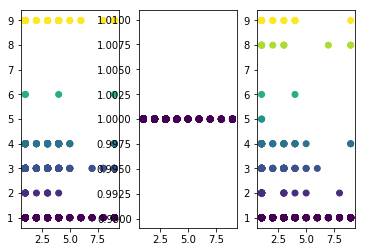

In [248]:
plt.subplot(1,3,1)
plt.scatter(Y_test,ypred_gnb,c=ypred_gnb)
plt.subplot(1,3,2)
plt.scatter(Y_test,ypred_svm_linear,c=ypred_svm_linear)
plt.subplot(1,3,3)
plt.scatter(Y_test,ypred_svm_rbf,c=ypred_svm_rbf)
# svm_rbf_sv = svm_rbf.support_
# plt.scatter(X[svm_rbf_sv,2],X[svm_rbf_sv,3],color="red")
plt.show()